# SOM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

## 観測データ
- N: データ数
- x: 観測データ

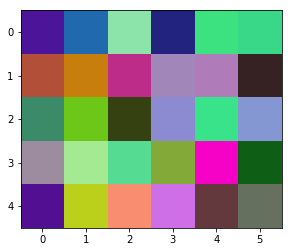

In [2]:
N = 30
x = np.random.randint(0, 255, (N, 3))

plt.imshow(x.reshape(5, 6, 3))
plt.show()

## 学習
- l: MAPの1辺の長さ
- K: ノード数
- T: 最大学習回数
- τ: 近傍半径縮小パラメータ
- y: 参照ベクトル

100%|██████████| 100/100 [00:52<00:00,  1.89it/s]


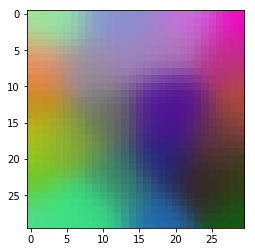

In [3]:
l = 30
K = l ** 2
T = 100
τ = 100

y = np.random.randint(0, 255, (l*l, 3))

# 勝者ノード 
BMU = np.zeros(N, dtype=np.int64)
# 学習量
R = np.zeros((N, K))

def h(z, ζ, σ):
    return np.exp(-0.5 / (σ**2) * np.linalg.norm(z - ζ)**2)

for t in tqdm(range(T)):
    # step 1
    for n in range(N):
        k = np.argmin(np.linalg.norm(y - x[n], axis=1) ** 2)
        BMU[n] = k
    
    # step 2
    for n in range(N):
        for k in range(K):
            ζ = np.array([BMU[n]%l, BMU[n]//l]) 
            z = np.array([k%l, k//l])
            σ = np.max((l/2 *(1 - t/τ), l/10))
            R[n, k] = h(z, ζ, σ)
    
    # step 3
    for k in range(K):
         y[k] = (R[:, k].reshape(-1,1)*x).sum(axis=0) / R[:, k].sum()

    plt.imshow(y.reshape(l,l,3))
    plt.title('t={}'.format(t))
    plt.savefig('results/SOM/t={:03}.png'.format(t))
    plt.close()
    
plt.imshow(y.reshape(l,l,3))
plt.show()